## Import & Process Image

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, f1_score
from sklearn.metrics import precision_recall_curve, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

import glob

from src.functions import *

AUTOTUNE = tf.data.experimental.AUTOTUNE ## tf.data transformation parameters

pd.options.display.max_columns = 100

## Pipeline with Sampleset (Balanced dataset)

In [3]:
X = np.load('data_sample/sample_100x100.npy')
y = np.load('data_sample/sample_diagnosis.npy')

In [4]:
# Train/test split for Train Set
XX_train, X_test, yy_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(XX_train, yy_train, test_size=0.2, random_state=42, stratify=yy_train)

#### Train Model

In [73]:
## Import Model
model = VGG16(include_top=False, input_shape=(100, 100, 3))

## Transfer Learning
new_model = Sequential()
for layer in model.layers[:-2]: # just exclude the last two FC layers
    layer.trainable = False
    new_model.add(layer)
new_model.add(Conv2D(512, (5, 5), activation = 'relu', padding = 'same'))
new_model.add(MaxPooling2D(2,2))
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(1, activation ='sigmoid'))

In [74]:
opt = keras.optimizers.SGD(learning_rate=0.01)
new_model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Recall()])

In [75]:
history = new_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
25/25 [==============================] - 18s 724ms/step - loss: 0.6464 - accuracy: 0.6830 - recall_7: 0.6775 - val_loss: 0.9029 - val_accuracy: 0.4100 - val_recall_7: 0.7922
Epoch 2/10
25/25 [==============================] - 18s 736ms/step - loss: 0.5203 - accuracy: 0.7268 - recall_7: 0.7325 - val_loss: 0.6927 - val_accuracy: 0.6067 - val_recall_7: 0.5195
Epoch 3/10
25/25 [==============================] - 18s 721ms/step - loss: 0.4275 - accuracy: 0.8108 - recall_7: 0.8000 - val_loss: 0.5951 - val_accuracy: 0.7233 - val_recall_7: 0.2727
Epoch 4/10
25/25 [==============================] - 18s 709ms/step - loss: 0.4157 - accuracy: 0.8221 - recall_7: 0.8200 - val_loss: 0.8777 - val_accuracy: 0.5200 - val_recall_7: 0.7273
Epoch 5/10
25/25 [==============================] - 18s 707ms/step - loss: 0.4214 - accuracy: 0.8233 - recall_7: 0.8250 - val_loss: 0.6909 - val_accuracy: 0.6500 - val_recall_7: 0.4675
Epoch 6/10
25/25 [==============================] - 18s 715ms/step - loss: 

In [14]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(100,100,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

In [15]:
# opt = keras.optimizers.SGD(learning_rate=0.01)
# model.compile(optimizer=opt,
#               loss='binary_crossentropy',
#               metrics=['accuracy',tf.keras.metrics.Recall()])

In [16]:
# history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
25/25 [==============================] - 4s 142ms/step - loss: 0.6941 - accuracy: 0.4975 - recall_1: 0.9050 - val_loss: 0.7133 - val_accuracy: 0.2567 - val_recall_1: 1.0000
Epoch 2/20
25/25 [==============================] - 3s 117ms/step - loss: 0.6910 - accuracy: 0.5150 - recall_1: 0.9075 - val_loss: 0.7186 - val_accuracy: 0.2567 - val_recall_1: 1.0000
Epoch 3/20
25/25 [==============================] - 3s 116ms/step - loss: 0.6899 - accuracy: 0.5113 - recall_1: 0.9325 - val_loss: 0.7065 - val_accuracy: 0.3000 - val_recall_1: 0.8831
Epoch 4/20
25/25 [==============================] - 3s 117ms/step - loss: 0.6863 - accuracy: 0.5602 - recall_1: 0.7850 - val_loss: 0.7286 - val_accuracy: 0.2567 - val_recall_1: 0.9870
Epoch 5/20
25/25 [==============================] - 3s 113ms/step - loss: 0.6839 - accuracy: 0.5551 - recall_1: 0.8500 - val_loss: 0.6967 - val_accuracy: 0.4733 - val_recall_1: 0.4156
Epoch 6/20
25/25 [==============================] - 3s 115ms/step - loss: 0.6834

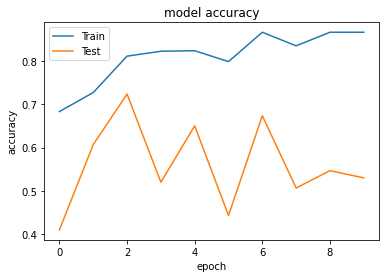

In [77]:
plot_accuracy(history)

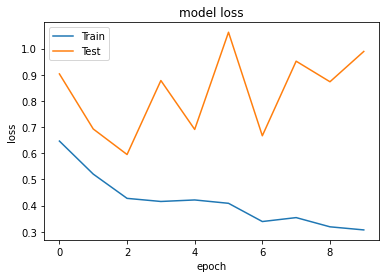

In [78]:
plot_loss(history)

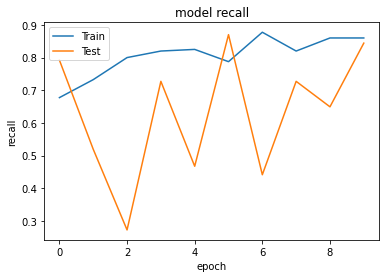

In [82]:
plot_recall(history, 'recall_7')

In [81]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'recall_7', 'val_loss', 'val_accuracy', 'val_recall_7'])

## Evalaution

In [83]:
# Validation Set
val_loss, val_acc, val_recall = new_model.evaluate(X_val, y_val, verbose=0)
print('Val  set accuracy {:5.2f}%'.format(100*val_acc))
print('Val  set recall   {:5.2f}%'.format(100*val_recall))

# Test Set
test_loss, test_acc, test_recall = new_model.evaluate(X_test, y_test, verbose=0)
print('Test set accuracy {:5.2f}%'.format(100*test_acc))
print('Test set recall   {:5.2f}%'.format(100*test_recall))


Val  set accuracy 77.50%
Val  set recall   91.00%
Test set accuracy 53.00%
Test set recall   84.42%


In [84]:
def matrix_score(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(np.array([[tp, fn],[fp, tn]]))
    print('Recall:    {:.3f}'.format(tp/(tp+fn)))
    print('Precision: {:.3f}'.format(tp/(tp+fp)))
    print('Accuracy:  {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('ROC AUC:   {:.3f}'.format(roc_auc_score(y_test, y_pred)))

In [144]:
threshold = 0.3

In [145]:
# Validation Set
result = (new_model.predict(X_val) > threshold).astype(int)
result =[i[0] for i in result]
y_val_pred = np.asarray(result)

matrix_score(y_val, y_val_pred)

[[98  2]
 [53 47]]
Recall:    0.980
Precision: 0.649
Accuracy:  0.725
ROC AUC:   0.725


In [146]:
# Test Set
result = (new_model.predict(X_test) > threshold).astype(int)
result =[i[0] for i in result]
y_test_pred = np.asarray(result)

matrix_score(y_test, y_test_pred)

[[ 74   3]
 [189  34]]
Recall:    0.961
Precision: 0.281
Accuracy:  0.360
ROC AUC:   0.557


## ROC AUC Curve

In [102]:
y_val_pred_keras = new_model.predict(X_val).ravel()

In [96]:
y_pred_keras = new_model.predict(X_test).ravel()

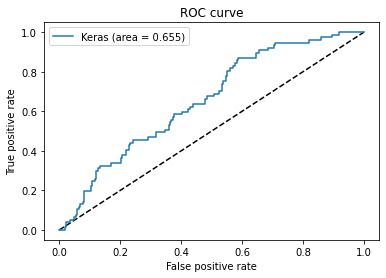

In [103]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()